# Comparison of misclassification error, entropy, and the Gini index

**EE514: Data Analysis and Machine Learning**

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns

## Implementation of impurity measures

Here we write some functions to implement the impurity measures from the notes. Each function takes a $N\times K$ matrix, where $N$ is the number of examples and $K$ is the number of classes, containing the proportion of the examples that belong to each class.

In [ ]:
def misclassification_error(p):
    return 1.0 - p.max(axis=1)

def gini_index(p):
    return (p * (1 - p)).sum(axis=1)

def entropy(p):
    return -(p * np.log2(p + 1e-16)).sum(axis=1)

def scaled_entropy(p):
    return entropy(p) / p.shape[1]

## Calculation of impurity for a two class problem

Here we examine the behaviour of the measures for a two class problem where there are proportion $p$ examples of the first class and $1-p$ examples of the second in a node. We let $p$ vary from 0 to 1 in 100 increments and calculate misclassification error, gini index, and scaled entropy for each value of $p$.

In [ ]:
# proportion in first class
p_first = np.linspace(0, 1, 100)

# histogram of proportions for two classes
h = np.c_[p_first, 1.0 - p_first]

# impurity metrics
E = misclassification_error(h)
G = gini_index(h)
H = scaled_entropy(h)

We can now plot the metrics as a function of $p$

In [ ]:
figure(figsize=(8,6))
plot(p_first, E, label='misclassification error')
plot(p_first, G, label='gini index')
plot(p_first, H, label='entropy')
ylim(0, 0.55)
legend()
xlabel('p')
ylabel('impurity')
show()

You can see that the Gini index is a good approximation of (scaled) entropy.

## Issues with misclassification error

Here we illustrate some of the problems with using misclassification error with a simple scenario.

We constuct two nodes. The first has objects of three categories with 7 in the first, 3 in the second, and 4 in the third. The second node has 7 objects of one type and 7 of another.

In [ ]:
p1 = np.array([[7, 3, 4]]) / 14.
p2 = np.array([[7, 7]]) / 14.
print('p1 =', p1[0])
print('p2 =', p2[0])

p1 = [0.5        0.21428571 0.28571429]
p2 = [0.5 0.5]


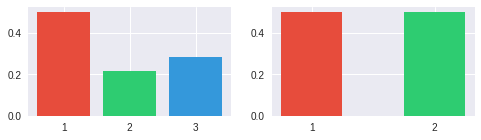

In [ ]:
colors = '#e74c3c', '#2ecc71', '#3498db'
figure(figsize=(8,2))
subplot(1, 2, 1)
bar(arange(3), p1[0], width=0.8, color=colors)
xticks(arange(3), (1,2,3))
subplot(1, 2, 2)
bar(arange(2), p2[0], width=0.5, color=colors)
xticks(arange(2), (1,2))
show()

Intuitively, the impurity of the first node is larger, since it would be more difficult to predict the outcome of a random draw (i.e. the entropy is higher). However, the misclassification error (assuming the dominant class is the correct one) is the same for both.

In [ ]:
print(misclassification_error(p1))
print(misclassification_error(p2))

[0.5]
[0.5]


The entropy (measured in bits) of the first node is clearly larger.

In [ ]:
print(entropy(p1))
print(entropy(p2))

[1.49261407]
[1.]


This is also reflected in the Gini index.

In [ ]:
print(gini_index(p1))
print(gini_index(p2))

[0.62244898]
[0.5]


So both the entropy and Gini index can distinguish these scenarios, but the misclassification error cannot.